In [1]:
%rm -rf __pycache__/ ../metrics/__pycache__

In [87]:
import sys, os
sys.path.append(os.path.abspath("../metrics/"))
import numpy as np
import bin_optimizer as bo
import place_from_map as pm
import matplotlib.pyplot as plt
import mplhep as hep
import ROC_curves
import cProfile


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x15539eae4a10>, cbar=<matplotlib.colorbar.Colorbar object at 0x15539fa93e90>, text=[])

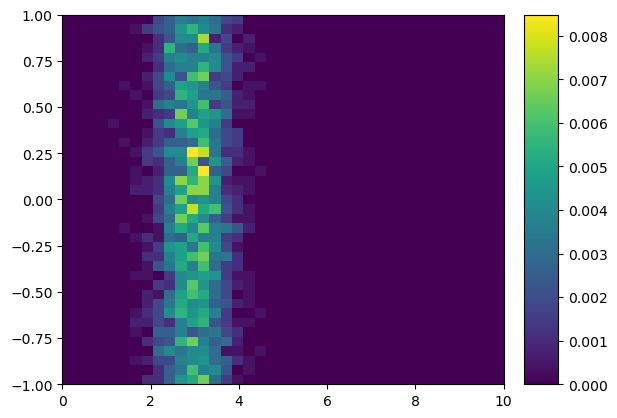

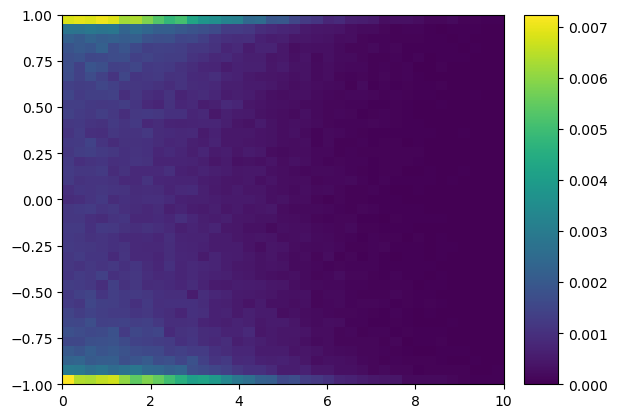

In [256]:
testing1 = np.hstack(
    (
        np.random.normal(3, 0.5, (20000,1)), 
        np.random.choice([-1, 1], size=(20000,1))*np.sinh(np.random.rand(20000,1)*2*np.pi)
    ),
)


testing2 = np.hstack(
    (
        np.abs(np.random.normal(0, 3, (100000,1))),
        np.cos(np.random.rand(100000,1)*2*np.pi)
    )
)

bins = np.linspace(0, 10, 40)
bins2 = np.linspace(-1,1,40)

signal, *_ = np.histogram2d(testing1[:,0], testing1[:,1], (bins, bins2))
signal = signal/np.sum(signal)
bkg, *_ = np.histogram2d(testing2[:,0], testing2[:,1], (bins, bins2))
bkg = bkg/np.sum(bkg)

plt.figure()
hep.hist2dplot(signal, bins, bins2)
plt.figure()
hep.hist2dplot(bkg, bins, bins2)

# ROC_curves.ROC_score(signal.astype(float), bkg.astype(float))

In [300]:
import importlib
importlib.reload(bo)

<module 'bin_optimizer' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/bin_optimizer.py'>

In [301]:
%rm .*.npy .*.hdf5

rm: cannot remove '.*.npy': No such file or directory
rm: cannot remove '.*.hdf5': No such file or directory


In [302]:
pr.disable()

In [303]:
merger = bo.MergerNonlocal(
    (
        bins,
        bins2
    ),
    signal.copy(),
    bkg.copy(),
)
pr = cProfile.Profile()
pr.enable()
new_bins = merger.run(3)
pr.disable()
pr.print_stats()
print(new_bins)
# signalNew, _ = np.histogram(testing1, new_bins)
# bkgNew, _ = np.histogram(testing2, new_bins)
# hep.histplot([signalNew, bkgNew], new_bins);
# ROC_curves.ROC_score(signalNew.astype(float), bkgNew.astype(float))


Binning non-locally:: 100%|██████████| 1518/1518 [01:02<00:00, 24.36it/s] 

         37288387 function calls (37279279 primitive calls) in 62.310 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 448761339.py:1(<module>)
     1518    0.004    0.000    0.142    0.000 <__array_function__ internals>:177(unravel_index)
     6072    0.002    0.000    0.006    0.000 <frozen abc>:117(__instancecheck__)
     1518    0.003    0.000    0.006    0.000 <frozen importlib._bootstrap>:1037(_resolve_name)
     1518    0.002    0.000    0.003    0.000 <frozen importlib._bootstrap>:1103(_sanity_check)
     1518    0.003    0.000    0.005    0.000 <frozen importlib._bootstrap>:1167(_find_and_load)
     1518    0.004    0.000    0.018    0.000 <frozen importlib._bootstrap>:1194(_gcd_import)
        1    0.000    0.000    0.000    0.000 <frozen os>:673(__getitem__)
        1    0.000    0.000    0.000    0.000 <frozen os>:755(encode)
     3036    0.002    0.000    0.003    0.

In [ ]:
[[0.         0.57654002 0.42345998]
 [0.61433833 0.09126849 0.29439318]]

In [ ]:
[[0.61667835 0.0192712  0.36405046]
 [0.10638617 0.61939171 0.27422212]]

In [46]:
bo.closest_pair_driver.signatures

[(int64,
  ListType(int64),
  Array(float64, 2, 'C', False, aligned=True),
  Array(float64, 2, 'C', False, aligned=True),
  int64,
  Array(float64, 2, 'C', False, aligned=True))]

In [83]:
importlib.reload(pm)

<module 'place_from_map' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/place_from_map.py'>

In [85]:
pm.place_event_nonlocal(
    3,
    4,
    0.9,
    verbose=True
)

original index of: 7
This places your point in the range:
[ 3.6842105263157894 , 4.2105263157894735 ]
original index of: 8
This places your point in the range:
[ 0.7777777777777777 , 1.0 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2
 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1 2 2 0 0
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


2

In [84]:
pm.place_array_nonlocal(
    3,
    [
        [9,0],
        [4,0.9]
    ],
    verbose=True
)

Original indices
[[17  4]
 [ 7  8]]


array([0, 2], dtype=uint32)

In [135]:
import importlib
importlib.reload(bo)

<module 'bin_optimizer' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/bin_optimizer.py'>

Binning locally:: 100%|██████████| 6/6 [00:00<00:00, 3018.93it/s]

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 2.43846963e+10]
 [5.00000000e+00 6.00000000e+00 0.00000000e+00]
 [6.00000000e+00 7.00000000e+00 0.00000000e+00]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 5.19539084e+10]
 [5.00000000e+00 6.00000000e+00 0.00000000e+00]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 6.51872811e+10]]


0.8084426712877234

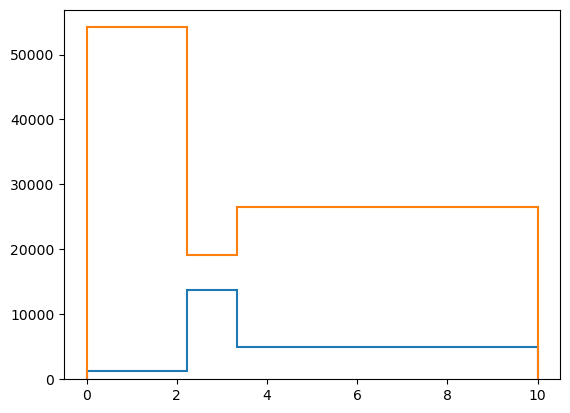

In [137]:
merger = bo.MergerLocal(
    bins.copy(),
    signal.copy(),
    bkg.copy()
)
new_bins = merger.run(3)
print(new_bins)
signalNew, _ = np.histogram(testing1, new_bins)
bkgNew, _ = np.histogram(testing2, new_bins)
hep.histplot([signalNew, bkgNew], new_bins)
ROC_curves.ROC_curve(signalNew.astype(float), bkgNew.astype(float))
